<a href="https://colab.research.google.com/github/hamiin47/OB-session/blob/main/Assign_0509.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.4 파이토치 코드 맛보기**

In [1]:
! pip  install --upgrade  matplotlib --use-feature=2020-resolver
! pip  install --upgrade  seaborn  --use-feature=2020-resolver
! pip  install --upgrade  scikit-learn --use-feature=2020-resolver


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

option --use-feature: invalid choice: '2020-resolver' (choose from 'fast-deps', 'truststore', 'no-binary-enable-wheel-cache')

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

option --use-feature: invalid choice: '2020-resolver' (choose from 'fast-deps', 'truststore', 'no-binary-enable-wheel-cache')

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [opti

In [2]:
# 필요한 라이브러리 호출
import torch
import torch.nn as nn
import numpy as np    # 벡터 및 행렬 연산에서 매우 편리한 기능을 제공하는 파이젠 라이브러리 패키지
import pandas as pd   # 데이터 처리를 위해 널리 사용되는 파이씬 라01브러리 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 데이터 로드
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/ESAA/OB/csv/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<Axes: ylabel='count'>

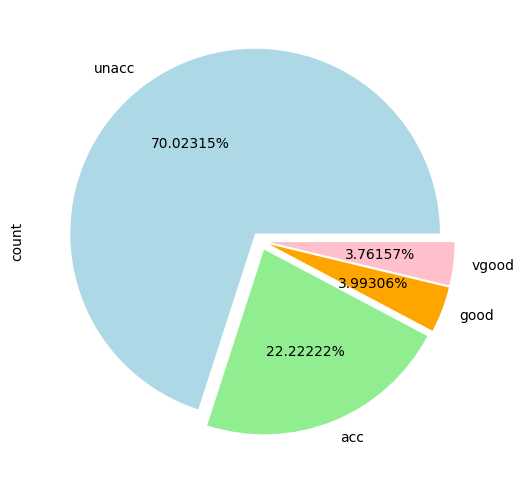

In [5]:
# 예제 데이터셋 분포
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"]  = fig_size
dataset.output.value_counts().plot(kind='pie', autopct= '%0.05f%%',
colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))

딥러닝은 통계 알고리즘을 기반으로 하기 떄문에 단어를 숫자(텐서)로 변환해야한다.

In [6]:
# 데이터를 범주형 타입으로 변환
categorical_columns = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety']   # 예제 데이터셋 칼럼들의 목록

for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')   # astype() 메서드를 이용하여 데이터를 범주형으로 변환

price = dataset['price'].cat.codes.values ### 1
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1) ### 2
categorical_data[:10]   # 합친 넘파이 배열 중 열 개의 행을 출력하여 보여 줍니다.

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

1) 범형 데이터를 텐서로 변환하기 위해 다음과 같은 절차가 필요하다

**범주형 데이터 -> dataset[category]-> 넘파이 배열(NumPy array) -> 텐서(Tensor)**

** 범주형 데이터를 숫자로 변환하기 위해 cat.codes를 사용하는데 cat.codes는 어떤 클래스가 어떤 숫자로 매핑되어 있는지 확인이 어려운 단점이 있으므로 주의해서 사용해야한다.

2) np.stack은 두 개 이상의 넘파이 객체를 합칠 때 사용한다.

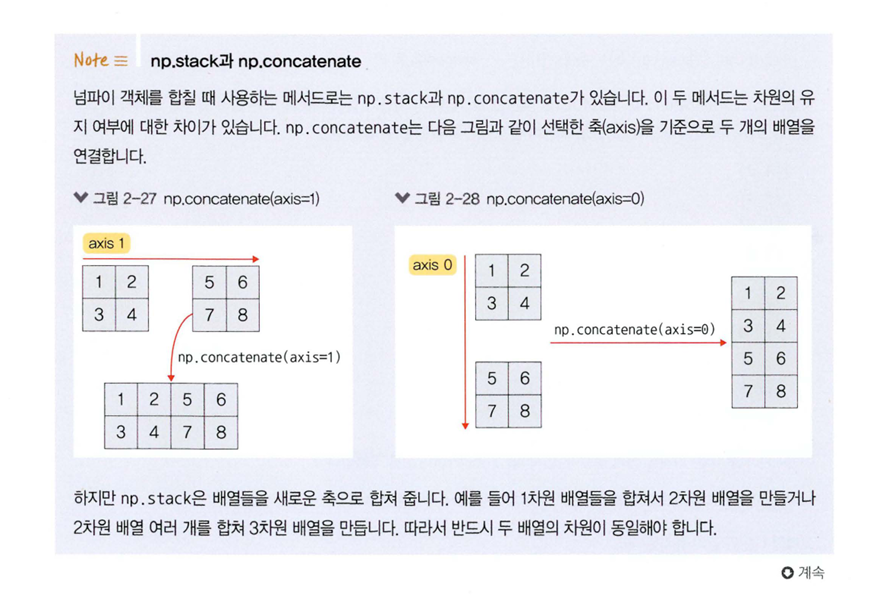

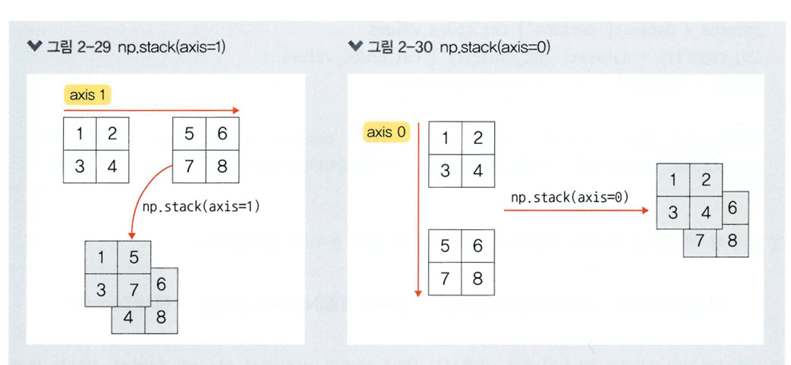

In [7]:
a = np.array([[1, 2], [3, 4]])           # a.shape=(2, 2)
b = np.array([[5, 6], [7, 8]])           # b.shape=(2, 2)
c = np.array([[5, 6], [7, 8], [9, 10]])  # c.shape=(3, 2)

print(np.concatenate((a, b), axis=0))    # shape=(4, 2)
print('-------------------------------')
print(np.stack((a, b), axis=0))          # shape=(2, 2, 2)

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
-------------------------------
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [8]:
print(np.concatenate((a, c), axis=0))      # shape=(5, 2)
# print(np.stack((a, c), axis=0))          # error

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [9]:
# 배열을 텐서로 변환
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [10]:
# 레이블로 사용할 칼럼을 텐서로 변환
outputs = pd.get_dummies(dataset.output) ### 1
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()   # 1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [11]:
# 성별(gender), 몸무게(weight), 국적(nation) 칼럼을 갖는 배열 생성
import pandas as pd
import numpy as np

data = {
    'gender' : ['male','female','male'],
    'weight' : [72,55,68],
    'nation' : ['Japan','Korea','Australia']
}

df = pd.DataFrame(data)
df

,gender,weight,nation
0,male,72,Japan
1,female,55,Korea
2,male,68,Australia


In [12]:
pd.get_dummies(df)

,weight,gender_female,gender_male,nation_Australia,nation_Japan,nation_Korea
0,72,False,True,False,True,False
1,55,True,False,False,False,True
2,68,False,True,True,False,False


In [13]:
a = np.array([[1, 2],
              [3, 4]])
print(a.ravel())
print(a.reshape(-1))
print(a.flatten())

[1 2 3 4]
[1 2 3 4]
[1 2 3 4]


In [14]:
# 범주형 칼럼을 N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in
                            categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in
                               categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [15]:
# 데이터셋 분리
total_records = 1728
test_records = int(total_records * .2)   # 전체 데이터 중 20%를 테스트 용도로 사용

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

In [16]:
# 데이터셋 분리 확인
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [17]:
class Model(nn.Module): ### 1
    def __init__(self, embedding_size, output_size, layers, p=0.4): ### 2
        super().__init__() ### 3
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni,
                                     nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols   # 입력층의 크기를 찾기 위해 범주형 칼럼 개수를 input_size 변수에 저장

        for i in layers: ### 4
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical): ### 5
        embeddings = []
        for i, e in enumerate(self.all_embeddings):
           embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)   # 넘파이의 concatenate와 같지만 대상이 텐서
        x = self.embedding_dropout(x)
        x = self.layers(x)

        return x

1) 클래스 형태로 구현되는 모델은 nn.Module을 상속받는다.

2) __init__()은 모델에서 사용될 파라미터와 신경망을 초기화하기 위한 용도로 사용하며, 객체가 생성될 떄 자동으로 호출된다.

-> init()의 매개변수는 다음과 같다

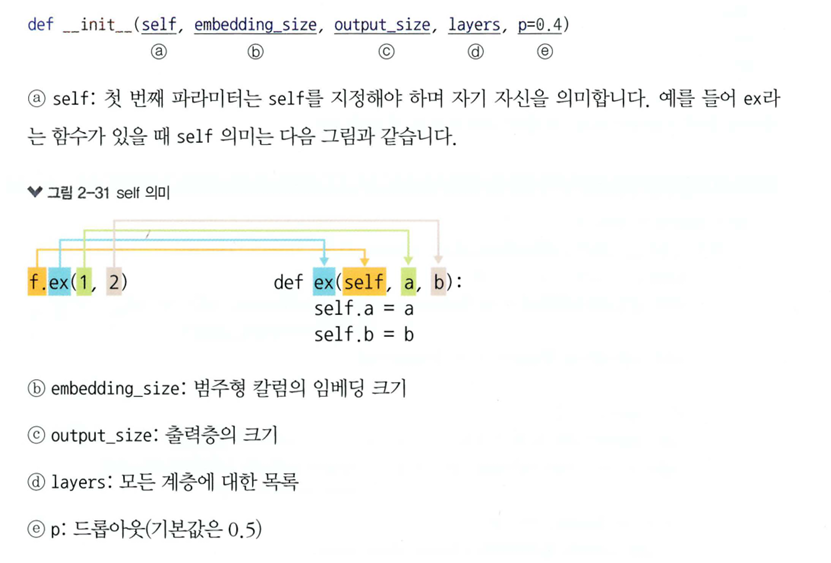

3) super(), __init__()은 부모 클래스에 접근할 떄 사용한다.

4) 모델의 네트워크 계층을 구축하기 위해 for 문을 이용하여 각 계층을 all_layers 목록에 추가한다.

-> 추가한 계층은 다음과 같다

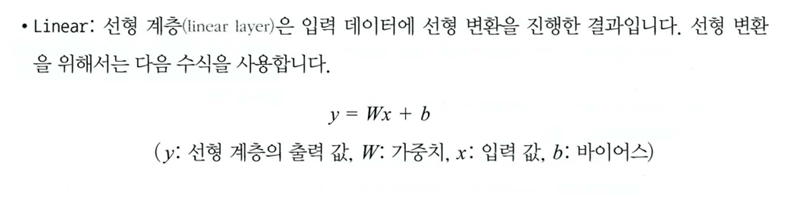

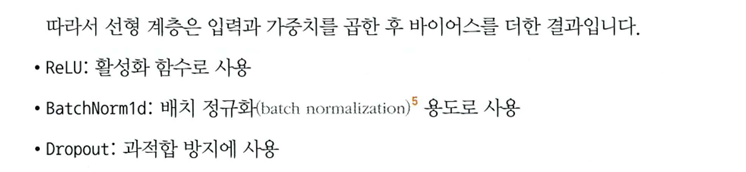

5) forward() 함수는 학습 데이터를 입력받아서 연산을 진행한다. -> 모델 객체를 데이터와 함께 호출하면 자동으로 실행된다.

In [18]:
# Model 클래스의 객체 생성
model = Model(categorical_embedding_sizes, 4, [200,100,50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [19]:
# 모델의 파라미터 정의
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
# CPU/GPU 사용 지정
if torch.cuda.is_available():
   device = torch.device('cuda')   # GPU가 있다면 GPU를 사용
else:
   device = torch.device('cpu')    # GPU가 없다면 CPU를 사용

In [21]:
# 모델 학습
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs):   # for문은 500회 반복되며, 각 반복마다 손실 함수가 오차를 계산
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)   # 반복할 때마다 오차를 aggregated_losses에 추가

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()   # 가중치를 업데이트하기 위해 손실 함수의 backward() 메서드 호출
    optimizer.step()   # 옵티마이저 함수의 step() 메서드를 이용하여 기울기 업데이트


print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')   # 오차가 25 에포크마다 출력

epoch:   1 loss: 1.49158239
epoch:  26 loss: 1.33478093
epoch:  51 loss: 1.26961398
epoch:  76 loss: 1.16061664
epoch: 101 loss: 1.02571535
epoch: 126 loss: 0.91572756
epoch: 151 loss: 0.81272280
epoch: 176 loss: 0.73463511
epoch: 201 loss: 0.67150599
epoch: 226 loss: 0.65695727
epoch: 251 loss: 0.63190055
epoch: 276 loss: 0.61194181
epoch: 301 loss: 0.61511970
epoch: 326 loss: 0.58857244
epoch: 351 loss: 0.59523374
epoch: 376 loss: 0.58005607
epoch: 401 loss: 0.58101505
epoch: 426 loss: 0.58441192
epoch: 451 loss: 0.57776886
epoch: 476 loss: 0.57130033
epoch: 500 loss: 0.5730872750


In [22]:
#테스트 데이터셋으로 모델 예측
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
     y_val = model(categorical_test_data)
     loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.56031036


In [23]:
# 모델의 예측 확인
print(y_val[:5])

tensor([[ 2.8360,  1.6781, -3.2754, -3.2000],
        [ 2.6287,  1.4199, -2.5976, -2.4982],
        [ 1.7224,  1.1116, -1.4516, -1.4336],
        [ 3.3429,  2.1661, -3.7483, -3.7054],
        [ 2.1730,  1.2292, -2.9725, -2.9043]])


In [24]:
# 가장 큰 값을 갖는 인덱스 확인
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


In [25]:
# 테스트 데이터셋을 이용한 정확도 확인
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs,y_val) )
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs,y_val))

[[258   1]
 [ 86   0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       0.00      0.00      0.00        86

    accuracy                           0.75       345
   macro avg       0.38      0.50      0.43       345
weighted avg       0.56      0.75      0.64       345

0.7478260869565218


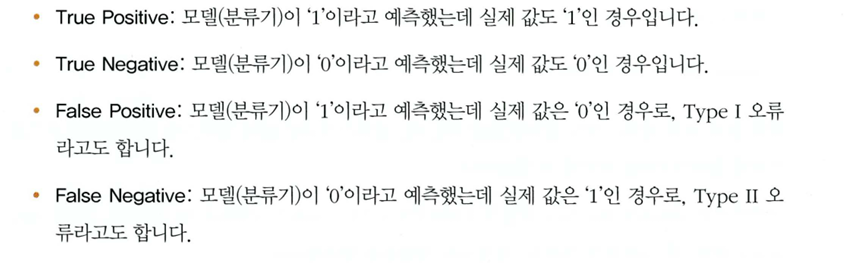

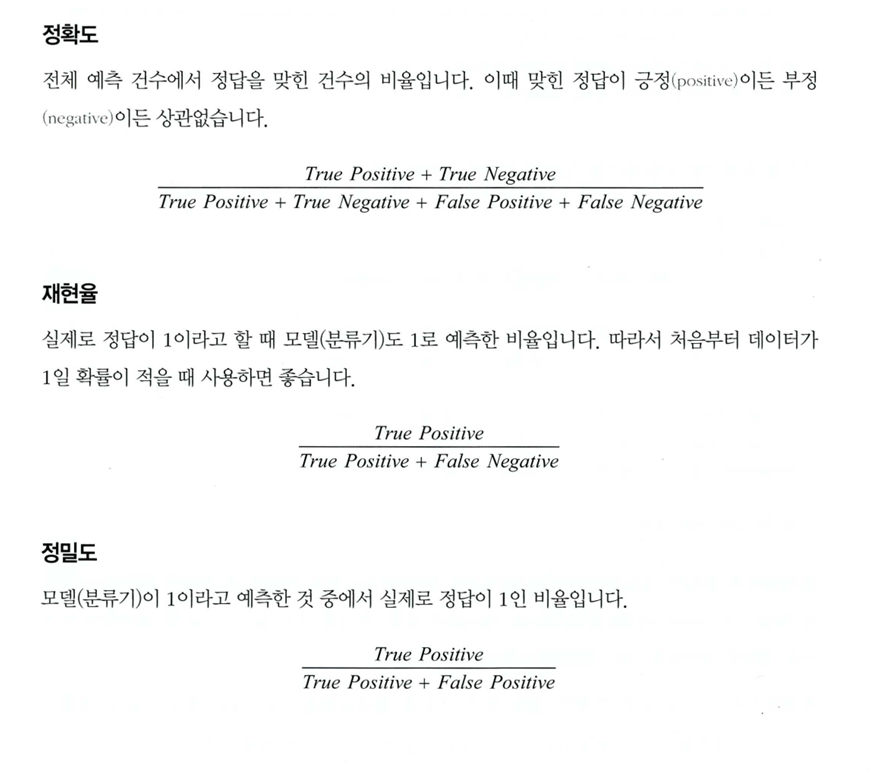

F1 score

일반적으로 정밀도와 재현율은 트레이드오프 관계이다.

- 정밀도가 높으면 재현율이 낮고, 재현율이 높으면 정밀도가 낮다.
- 이러한 트레이드오프 문제를 해결하려고 정밀도와 재현율의 조화 평균을 이용한 것이 F1-score 평가이다.

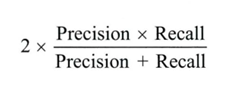